# Diamonds Price Prediction

### Import Libraries

In [1]:
# Data Cleaning
import pandas as pd

# Array Functions
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Data Pre-Processing

##### Read Data

In [2]:
df = pd.read_csv("../input/diamonds/diamonds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


price : price in US dollars 

carat : weight of the diamond 

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color : diamond colour, from J (worst) to D (best)

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x : length in mm 

y : width in mm 

z : depth in mm 

depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y)

table : width of top of diamond relative to widest point

In [3]:
# Dropping Un-Required Columns 

df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


###### Removing zeroes from x,y and z as it represents length, width and hieght

In [5]:
#filling nan inplace of zeroes
df[['x', 'y', 'z']] = df[['x', 'y', 'z']].replace(0, np.NaN)

# dropping those nan values
df.dropna(inplace=True)

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Removing outliers via IQR

In [7]:
def outliers_iqr(df, feat):
    q25, q75 = np.percentile(df[feat], q=[25, 75])
    iqr = q75 - q25
    upp_lmt = q75 + iqr*1.45
    lwr_lmt = q25 - iqr*1.45
    return df[(df[feat] > upp_lmt) | (df[feat] < lwr_lmt)].index.to_list()

##### Carat

<AxesSubplot:xlabel='carat'>

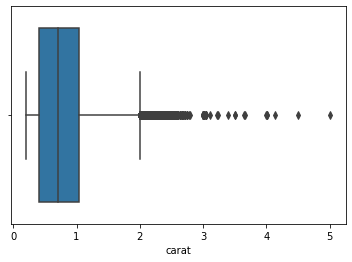

In [8]:
sns.boxplot(x=df['carat'])

In [9]:
df.drop(outliers_iqr(df, 'carat'), inplace=True)

<AxesSubplot:xlabel='carat'>

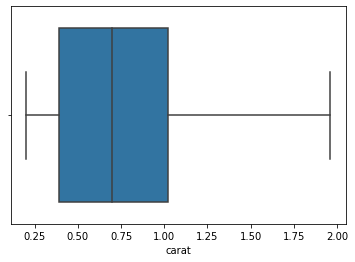

In [10]:
sns.boxplot(x=df['carat'])

##### depth

<AxesSubplot:xlabel='depth'>

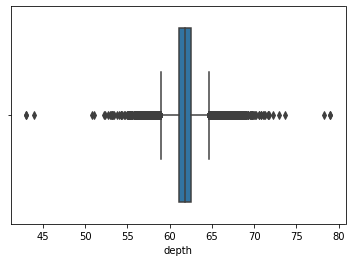

In [11]:
sns.boxplot(x=df['depth'])

In [12]:
df.drop(outliers_iqr(df, 'depth'), inplace=True)

<AxesSubplot:xlabel='depth'>

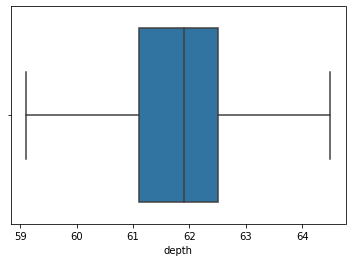

In [13]:
sns.boxplot(x=df['depth'])

##### table

<AxesSubplot:xlabel='table'>

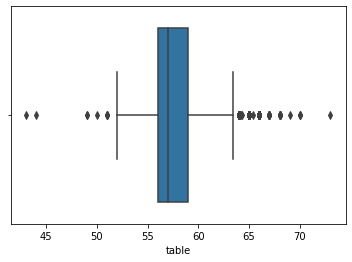

In [14]:
sns.boxplot(x=df['table'])

In [15]:
df.drop(outliers_iqr(df, 'table'), inplace=True)

<AxesSubplot:xlabel='table'>

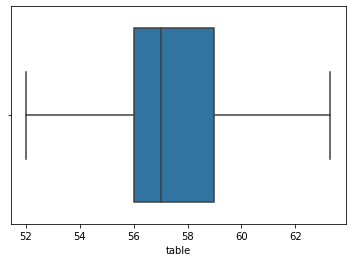

In [16]:
sns.boxplot(x=df['table'])

##### x

<AxesSubplot:xlabel='x'>

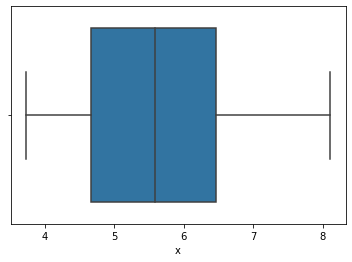

In [17]:
sns.boxplot(x=df['x'])

In [18]:
df.drop(outliers_iqr(df, 'x'), inplace=True)

<AxesSubplot:xlabel='x'>

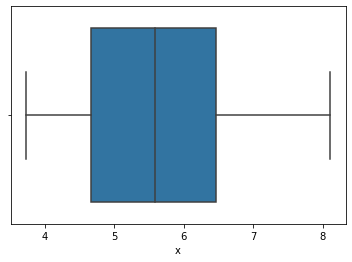

In [19]:
sns.boxplot(x=df['x'])

##### y

<AxesSubplot:xlabel='y'>

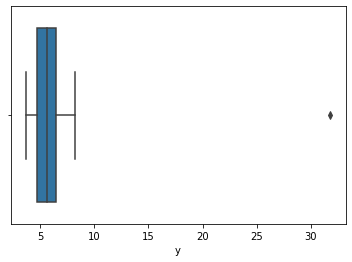

In [20]:
sns.boxplot(x=df['y'])

In [21]:
df.drop(outliers_iqr(df, 'y'), inplace=True)

<AxesSubplot:xlabel='y'>

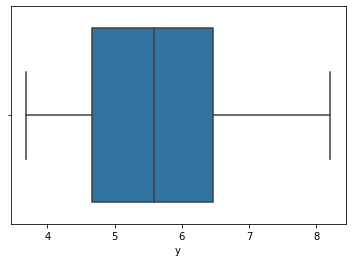

In [22]:
sns.boxplot(x=df['y'])

##### z

<AxesSubplot:xlabel='z'>

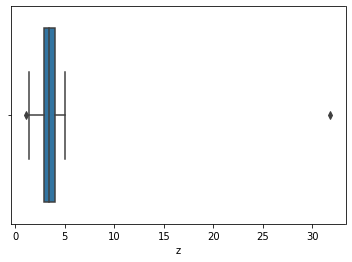

In [23]:
sns.boxplot(x=df['z'])

In [24]:
df.drop(outliers_iqr(df, 'z'), inplace=True)

<AxesSubplot:xlabel='z'>

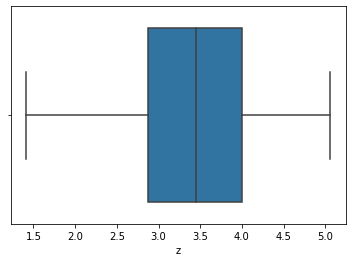

In [25]:
sns.boxplot(x=df['z'])

In [26]:
df.describe()

,carat,depth,table,price,x,y,z
count,48424.000000,48424.000000,48424.000000,48424.000000,48424.000000,48424.000000,48424.000000
mean,0.733410,61.803399,57.240119,3461.301070,5.600540,5.605497,3.462627
std,0.393191,1.060212,2.004498,3357.172412,1.016973,1.011434,0.628864
min,0.200000,59.100000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,61.200000,56.000000,906.000000,4.660000,4.670000,2.870000
50%,0.690000,61.900000,57.000000,2184.000000,5.590000,5.590000,3.450000
75%,1.020000,62.500000,59.000000,4916.000000,6.460000,6.460000,4.000000
max,1.960000,64.500000,63.300000,18806.000000,8.110000,8.210000,5.060000


In [27]:
# Dividing Data into Independent Features And Dependent Features

X = df.drop('price', axis=1)
y = df['price']

#### Data Visualization

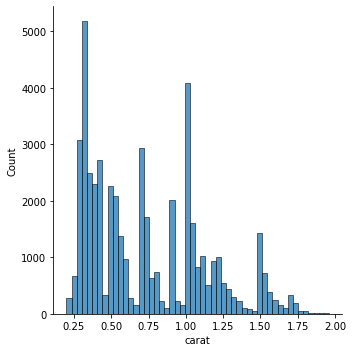

In [28]:
sns.displot(data = df, x='carat', kind='hist')

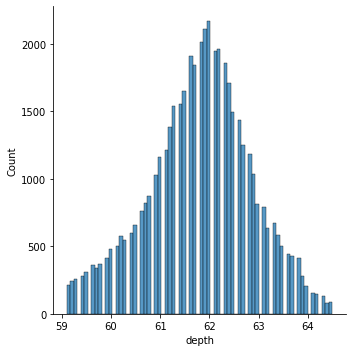

In [29]:
sns.displot(data = df, x='depth', kind='hist')

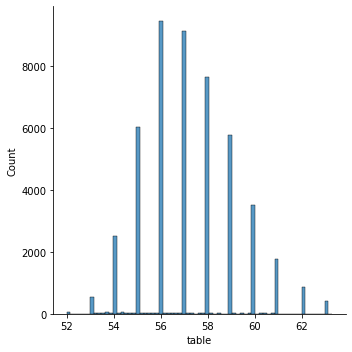

In [30]:
sns.displot(data = df, x='table', kind='hist')

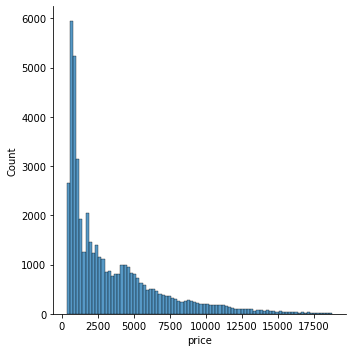

In [31]:
sns.displot(data = df, x='price', kind='hist')

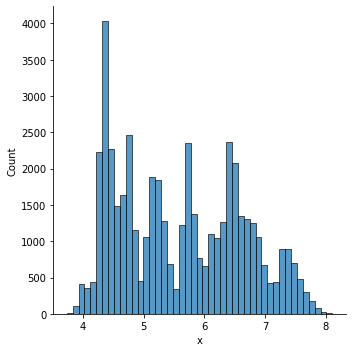

In [32]:
sns.displot(data = df, x='x', kind='hist')

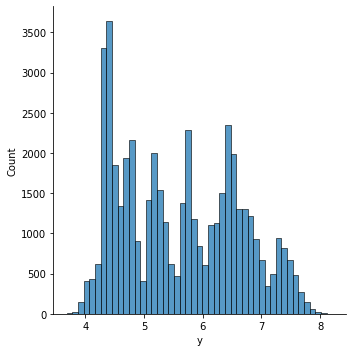

In [33]:
sns.displot(data = df, x='y', kind='hist')

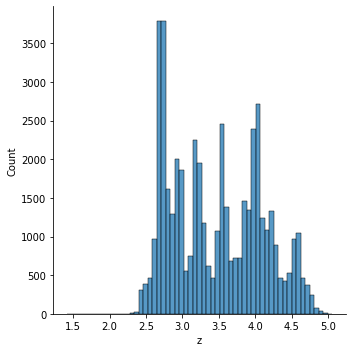

In [34]:
sns.displot(data = df, x='z', kind='hist')

#### Categorial Data Visualization

##### Cut Data Visualization

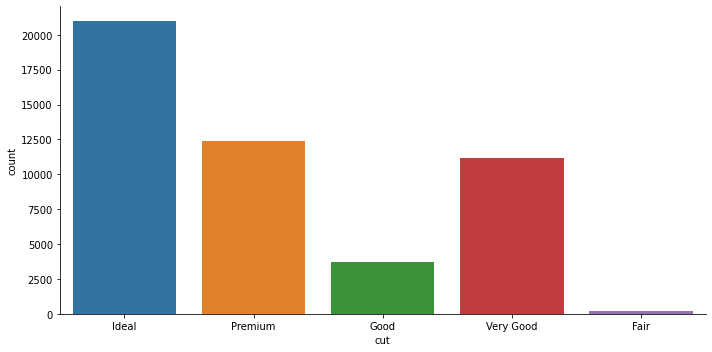

In [35]:
p = sns.catplot(x='cut', data=df, kind='count', aspect=2)

##### Color Data Visualization

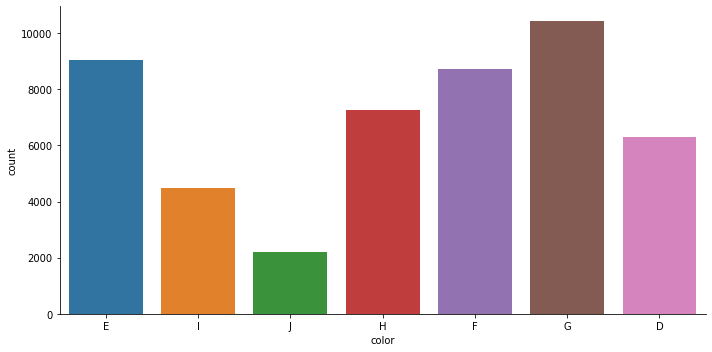

In [36]:
p = sns.catplot(x='color', data=df, kind='count', aspect=2)

##### Clarity Data Visualization

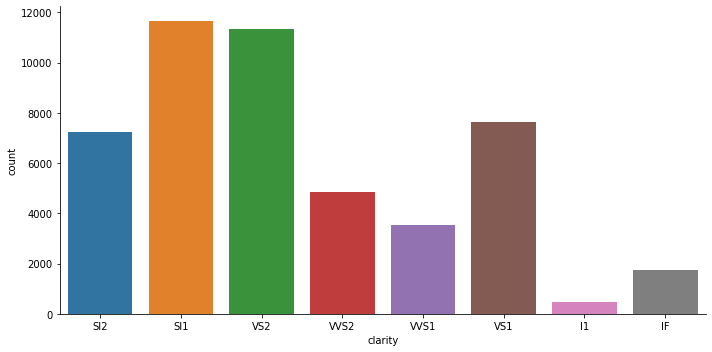

In [37]:
p = sns.catplot(x='clarity', data=df, kind='count', aspect=2)

#### Encoding Categorial Data

In [38]:
# Encoding The Data Using .get_dummies() from Pandas Library 
# Converting Unique Categorial data into further different columns to remove priorities that we get when using Label Encoder

def data_with_dummy_var(data):
    return pd.get_dummies(data)

X_clean = data_with_dummy_var(X)

In [39]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48424 entries, 0 to 53939
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          48424 non-null  float64
 1   depth          48424 non-null  float64
 2   table          48424 non-null  float64
 3   x              48424 non-null  float64
 4   y              48424 non-null  float64
 5   z              48424 non-null  float64
 6   cut_Fair       48424 non-null  uint8  
 7   cut_Good       48424 non-null  uint8  
 8   cut_Ideal      48424 non-null  uint8  
 9   cut_Premium    48424 non-null  uint8  
 10  cut_Very Good  48424 non-null  uint8  
 11  color_D        48424 non-null  uint8  
 12  color_E        48424 non-null  uint8  
 13  color_F        48424 non-null  uint8  
 14  color_G        48424 non-null  uint8  
 15  color_H        48424 non-null  uint8  
 16  color_I        48424 non-null  uint8  
 17  color_J        48424 non-null  uint8  
 18  clarit

### Visualizing Data Using HeatMap

<AxesSubplot:>

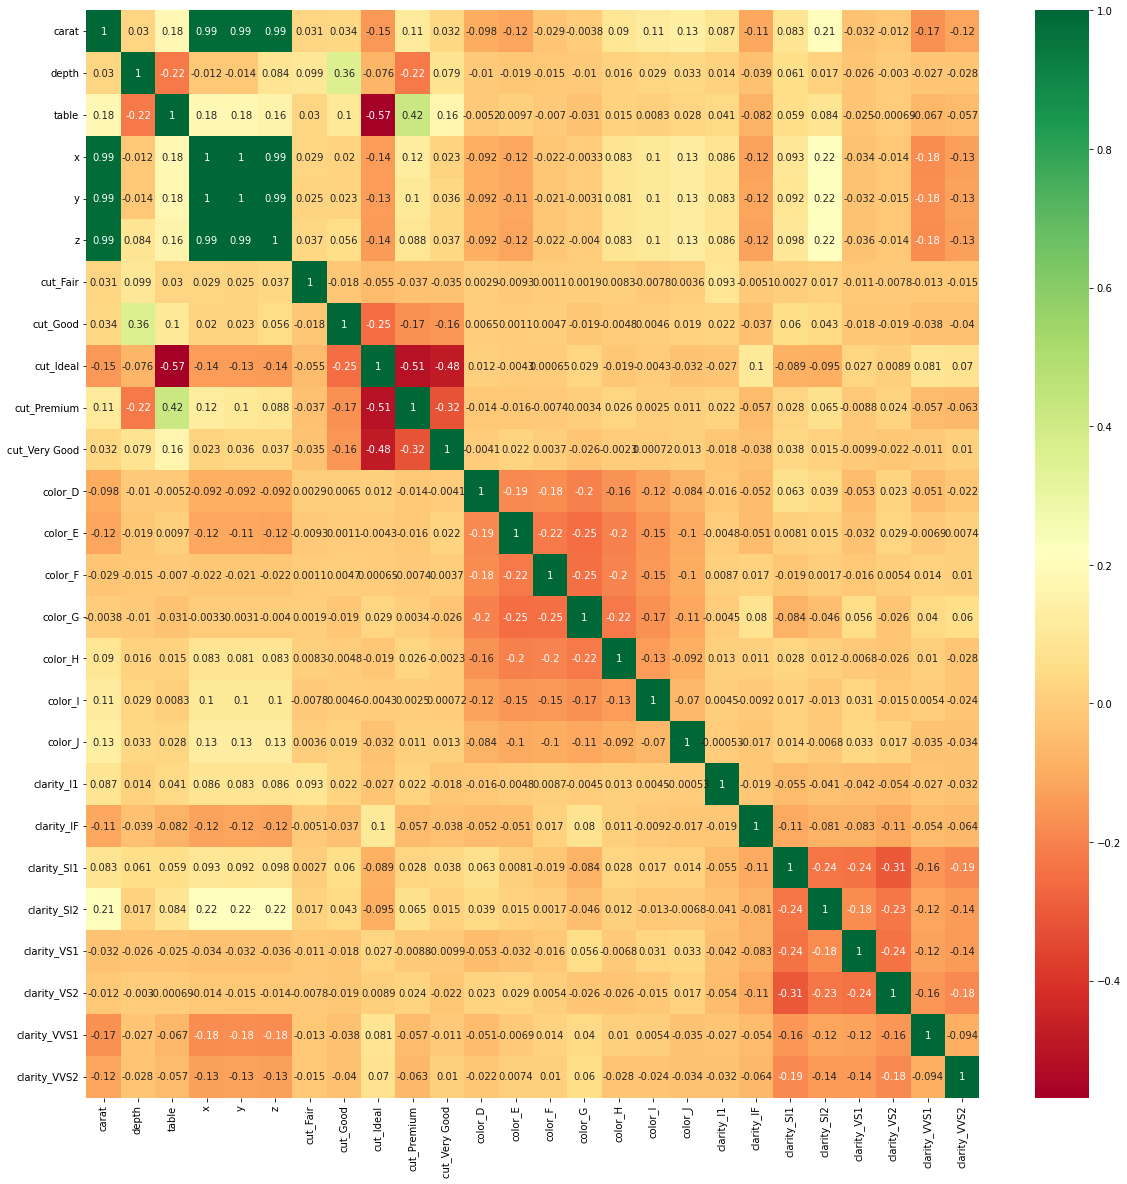

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(X_clean.corr(), annot=True,cmap='RdYlGn')

### Splitting Data For Training and Testing Phase for Machine Learning Models

In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_clean, y, test_size=0.2, random_state=1)

In [42]:
from sklearn.metrics import r2_score

### Decision Tree Model

In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_depth=13)
reg1.fit(xtrain, ytrain)

# Prediction
ypred =  reg1.predict(xtest)

# Checking Accuracy
r2_score(ytest, ypred)


0.9757758720624489

### Random Forest Model

In [44]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

reg2 = RandomForestRegressor(n_estimators=29, max_depth=17, random_state=1) # Criterion = Squared Error by default
reg2.fit(xtrain, ytrain)

# Predicting using Xtest Data
ypred = reg2.predict(xtest)

# Checking Accuracy
r2_score(ytest, ypred)


0.9829672675157708

In [45]:
xtrain.describe()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,...,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000,38739.000000
mean,0.733912,61.808562,57.238099,5.601182,5.606144,3.463399,0.003950,0.076873,0.432562,0.254859,...,0.092697,0.045174,0.009293,0.035778,0.242159,0.148584,0.157903,0.232944,0.073931,0.099409
std,0.394052,1.059721,2.003976,1.017772,1.012301,0.629532,0.062722,0.266394,0.495438,0.435788,...,0.290011,0.207689,0.095952,0.185738,0.428396,0.355683,0.364655,0.422712,0.261661,0.299214
min,0.200000,59.100000,52.000000,3.730000,3.710000,1.410000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380000,61.200000,56.000000,4.660000,4.670000,2.880000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.670000,61.900000,57.000000,5.580000,5.570000,3.440000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.020000,62.500000,59.000000,6.460000,6.460000,4.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.960000,64.500000,63.300000,8.110000,8.210000,4.980000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Scaling
#### Scaling data from features to improve accuracy for Linear Regression Model

In [46]:
from sklearn.preprocessing import StandardScaler

# Assining object for our scaler
scaler = StandardScaler()
xtrain.iloc[:, :7] = scaler.fit_transform(xtrain.iloc[:, :7])
xtest.iloc[:, :7] = scaler.transform(xtest.iloc[:, :7])

In [47]:
xtrain.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
12036,-0.999657,0.841211,-1.116843,-1.101618,-1.102595,-1.037926,-0.062970,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7860,0.700648,0.463748,-0.118815,0.745577,0.803977,0.820621,-0.062970,0,0,0,...,0,0,0,0,1,0,0,0,0,0
38301,-0.974280,0.558114,-0.118815,-1.111444,-1.092716,-1.053811,-0.062970,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20631,1.665000,0.558114,0.879214,1.511966,1.465843,1.551332,-0.062970,0,0,1,...,0,0,0,0,1,0,0,0,0,0
49831,0.269227,2.539794,1.378228,0.313255,0.231017,0.518806,15.880683,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Linear Regression

In [48]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(xtrain, ytrain)

# Predict Data Values using X Test
ypred = reg3.predict(xtest)

# Checking Accuracy Via R2_Score library
r2_score(ytest, ypred)


0.910485183606365

### Training Model with Whole Data
#### Best Model Accuracy is ~0.98 with Random Forest Model

In [49]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=29, max_depth=17, random_state=1) # Criterion = Squared Error by default
regressor.fit(X_clean, y)


RandomForestRegressor(max_depth=17, n_estimators=29, random_state=1)